In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("Credit_Card_Applications.csv")
data.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [2]:
X=data.iloc[:,:-1].values
Y=data.iloc[:,-1].values

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range= (0,1))
X=sc.fit_transform(X)

In [4]:
#Training the SOM
from minisom import MiniSom
som= MiniSom(x=10,y=10,input_len= 15,sigma=1.0,learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data= X,num_iteration = 50)

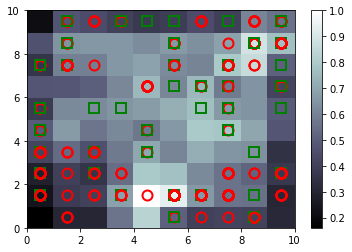

In [5]:
from pylab import bone,pcolor,colorbar,plot,show
bone()
pcolor(som.distance_map().T)
colorbar()
markers=['o','s']
colors=['r','g']
for i,x in enumerate(X):
    w= som.winner(x)
    plot(w[0]+0.5,
         w[1]+0.5,
        markers[Y[i]],
        markeredgecolor=colors[Y[i]],
        markerfacecolor='None',
        markersize=10,
        markeredgewidth=2)
show()

In [7]:
mappings=som.win_map(X)
frauds = mappings[(4,3)]
frauds=sc.inverse_transform(frauds)
print(frauds)

[[1.5803378e+07 1.0000000e+00 3.4920000e+01 5.0000000e+00 2.0000000e+00
  1.4000000e+01 8.0000000e+00 7.5000000e+00 1.0000000e+00 1.0000000e+00
  6.0000000e+00 1.0000000e+00 2.0000000e+00 0.0000000e+00 1.0010000e+03]
 [1.5788776e+07 1.0000000e+00 3.3170000e+01 1.0000000e+00 2.0000000e+00
  1.4000000e+01 4.0000000e+00 7.5000000e-01 1.0000000e+00 1.0000000e+00
  7.0000000e+00 1.0000000e+00 2.0000000e+00 3.4000000e+02 4.0720000e+03]
 [1.5750921e+07 1.0000000e+00 4.9500000e+01 7.5850000e+00 2.0000000e+00
  3.0000000e+00 5.0000000e+00 7.5850000e+00 1.0000000e+00 1.0000000e+00
  1.5000000e+01 1.0000000e+00 2.0000000e+00 0.0000000e+00 5.0010000e+03]
 [1.5762716e+07 1.0000000e+00 3.4170000e+01 1.5400000e+00 2.0000000e+00
  1.3000000e+01 4.0000000e+00 1.5400000e+00 1.0000000e+00 1.0000000e+00
  1.0000000e+00 1.0000000e+00 2.0000000e+00 5.2000000e+02 5.0001000e+04]
 [1.5744423e+07 1.0000000e+00 5.7830000e+01 7.0400000e+00 2.0000000e+00
  7.0000000e+00 4.0000000e+00 1.4000000e+01 1.0000000e+00 1.

In [9]:
#part-2 going from unsupervised to supervised
#creating the features of customers
customers = data.iloc[:,1:].values


In [10]:
is_fraud = np.zeros(len(data))
for i in range(len(data)):
    if data.iloc[i,0] in frauds:
        is_fraud[i] = 1

In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
customers=sc.fit_transform(customers)


In [12]:
from keras.models import Sequential
from keras.layers import Dense
classifier = Sequential()

C:\Users\Sahil\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [13]:
classifier.add(Dense(output_dim=2,init = 'uniform', activation = 'relu', input_dim=15))
classifier.add(Dense(output_dim=1,init = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(customers,is_fraud,batch_size= 1, nb_epoch = 1)

C:\Users\Sahil\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=15, units=2, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.
C:\Users\Sahil\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  
C:\Users\Sahil\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Epoch 1/1
690/690 [==============================] - 3s 4ms/step - loss: 0.4649 - acc: 0.9870


In [14]:
#Predicting the probabilities of the frauds
y_pred = classifier.predict(customers)
print(y_pred)

[[0.15647556]
 [0.19094738]
 [0.19003756]
 [0.2900968 ]
 [0.24331196]
 [0.20147716]
 [0.13017313]
 [0.19978714]
 [0.10717714]
 [0.18028513]
 [0.18773542]
 [0.17913847]
 [0.18721001]
 [0.20203169]
 [0.12063146]
 [0.11762742]
 [0.18279988]
 [0.23775029]
 [0.13440095]
 [0.30410022]
 [0.17206924]
 [0.18877244]
 [0.10378736]
 [0.09788617]
 [0.14323775]
 [0.17264542]
 [0.13122934]
 [0.25261208]
 [0.22820923]
 [0.25506118]
 [0.16053933]
 [0.23762922]
 [0.10259195]
 [0.23679727]
 [0.16943058]
 [0.17319043]
 [0.13969237]
 [0.21129654]
 [0.24439329]
 [0.24870963]
 [0.12938742]
 [0.15404834]
 [0.1372024 ]
 [0.1526513 ]
 [0.20081545]
 [0.28228155]
 [0.19371928]
 [0.1335176 ]
 [0.1727056 ]
 [0.24895522]
 [0.13063793]
 [0.11770102]
 [0.13623272]
 [0.16352953]
 [0.20623127]
 [0.23580788]
 [0.14335681]
 [0.1324931 ]
 [0.13885336]
 [0.17534663]
 [0.11648224]
 [0.26791912]
 [0.1548049 ]
 [0.14852904]
 [0.15018106]
 [0.18917184]
 [0.2138604 ]
 [0.13368112]
 [0.18944831]
 [0.23945408]
 [0.15209648]
 [0.22

In [15]:
y_pred = np.concatenate((data.iloc[:,0:1].values,y_pred),axis=1)
print(y_pred)

[[1.57761560e+07 1.56475559e-01]
 [1.57395480e+07 1.90947384e-01]
 [1.56628540e+07 1.90037563e-01]
 ...
 [1.56754500e+07 1.69455037e-01]
 [1.57764940e+07 2.37045154e-01]
 [1.55924120e+07 1.70859382e-01]]


In [16]:
y_pred = y_pred[y_pred[:,1].argsort()]
print(y_pred)

[[1.56365620e+07 7.77918100e-02]
 [1.58007730e+07 8.17588568e-02]
 [1.57484990e+07 8.58495459e-02]
 ...
 [1.56647930e+07 3.38229269e-01]
 [1.57627160e+07 3.38593513e-01]
 [1.56214230e+07 3.67533714e-01]]
